Jacqueline Sanchez <br> 
July 01, 2024 <br>
<br>
COSC 3337 | Summer 2024 <br>
Homework 5

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

import seaborn as sns

## Pre Processing Process

1. Import .data file

In [2]:
# Load the dataset
letters_df = pd.read_csv('letter-recognition.data', header=None)
letters_df.columns = ['letter'] + [f'feature_{i}' for i in range(1, 17)]

# Display the first 5 rows
print(letters_df.head())

  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5           9   

   feature_13  feature_14  feature_15  feature_16  
0           0           8         

2. checking for missing value

In [3]:
# method 1: 
print(letters_df.isna().sum())

# # methods 2: 
# print(heart_df.isnull().any())


if not letters_df.isnull().values.any():
    print("No missing data")
else:
    missing_count = letters_df.isnull().sum().sum()
    print(f"There are {missing_count} observations missing")

letter        0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
dtype: int64
No missing data


3. pairsplot of boxplots 

In [ ]:
# Initialize the PairGrid object
g = sns.PairGrid(letters_df, hue='letter')

# Map the boxplot to the diagonal
g.map_diag(sns.boxplot)

# Map the boxplot to the lower and upper triangles
g.map_lower(sns.boxplot)
g.map_upper(sns.boxplot)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

<span style = 'color:green'> 
Since there are no missing values in letters dataframe then we can proceed to the next steps without necessary imputations or dropping any column or observation row.

# 1. Preparing the data

In [4]:
# Choose two letters for binary classification
letters = ['J', 'N']
df_binary = letters_df[letters_df['letter'].isin(letters)].copy()
df_binary['letter'] = df_binary['letter'].map({'J': 0, 'N': 1})

# Split the data into features and target
X = df_binary.drop('letter', axis=1)
y = df_binary['letter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=letters, yticklabels=letters)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined

# 2. Train and Tune your models

### Train and Tune Naive Bayes Classifier

In [5]:
# Naive Bayes Classifier
nb_model = GaussianNB()
start_time = time.time()
nb_model.fit(X_train, y_train)
nb_time = time.time() - start_time # getting the time it took for nb to tune to best params

# predicting based on our model  
nb_y_pred = nb_model.predict(X_test) 
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_report = classification_report(y_test, nb_y_pred)

### Train and Tune Logistic Regression Classifier

In [6]:
# Logistic Regression Classifier
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5, n_jobs=-1, return_train_score=True)
start_time = time.time()
lr_grid.fit(X_train, y_train)
lr_time = time.time() - start_time # getting the time for lr tunning

# predicting based on our model 
lr_best = lr_grid.best_estimator_ # best lr model found while performing GridSearchCV
lr_y_pred = lr_best.predict(X_test) # predictions on the test set 
lr_accuracy = accuracy_score(y_test, lr_y_pred) # calculating accuracy
lr_report = classification_report(y_test, lr_y_pred) # generating classification report 

### Train and Tune KNN Classifier

In [7]:
# KNN Classifier
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1, return_train_score=True)
start_time = time.time()
knn_grid.fit(X_train, y_train)
knn_time = time.time() - start_time # getting the time for knn tunning

# predicting based on our model 
knn_best = knn_grid.best_estimator_ 
knn_y_pred = knn_best.predict(X_test) 
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred) 

### Evaluating and Comparing models (evidence)

In [9]:
# for Naive Bayes best Model
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Runtime: {nb_time} seconds")
print(f"Naive Bayes Classification Report:\n{nb_report}")

# for Logistic Regression best Model 
print(f"Logistic Regression Best Parameters: {lr_grid.best_params_}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression Runtime: {lr_time} seconds")
print(f"Logistic Regression Classification Report:\n{lr_report}")

# for KNN best model 
print(f"KNN Best Parameters: {knn_grid.best_params_}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN Runtime: {knn_time} seconds")
print(f"KNN Classification Report:\n{knn_report}")


Naive Bayes Accuracy: 0.9379084967320261
Naive Bayes Runtime: 0.004472970962524414 seconds
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       149
           1       0.90      0.99      0.94       157

    accuracy                           0.94       306
   macro avg       0.94      0.94      0.94       306
weighted avg       0.94      0.94      0.94       306

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9934640522875817
Logistic Regression Runtime: 1.2937500476837158 seconds
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.99      0.99      0.99       157

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.

# Performance Plots (evidence)

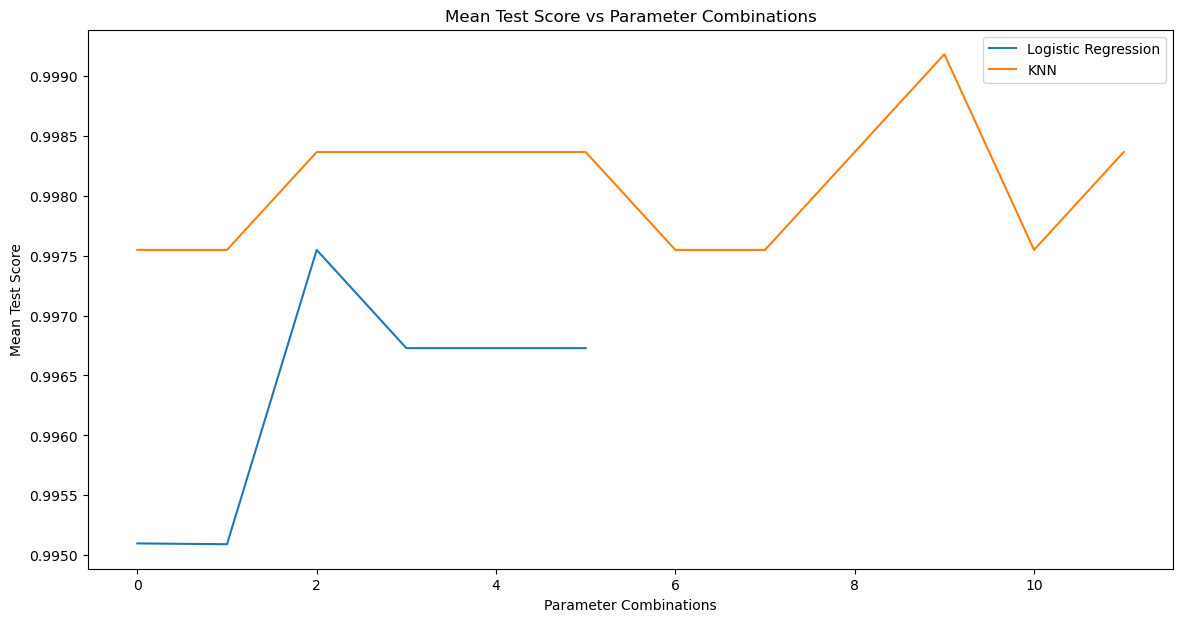

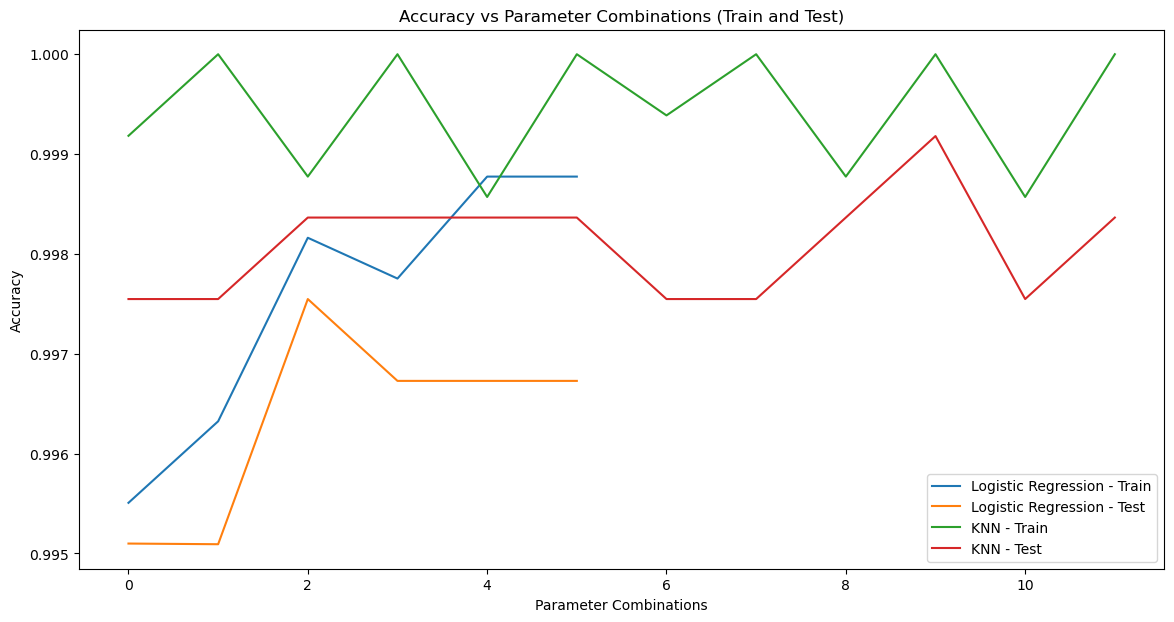

In [10]:
# Plotting accuracy vs parameter combinations
plt.figure(figsize=(14, 7))
plt.plot(range(len(lr_grid.cv_results_['mean_test_score'])), lr_grid.cv_results_['mean_test_score'], label='Logistic Regression')
plt.plot(range(len(knn_grid.cv_results_['mean_test_score'])), knn_grid.cv_results_['mean_test_score'], label='KNN')
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.legend()
plt.title('Mean Test Score vs Parameter Combinations')
plt.show()

# Plotting accuracy vs parameter combinations (train and test)
plt.figure(figsize=(14, 7))
plt.plot(range(len(lr_grid.cv_results_['mean_test_score'])), lr_grid.cv_results_['mean_train_score'], label='Logistic Regression - Train')
plt.plot(range(len(lr_grid.cv_results_['mean_test_score'])), lr_grid.cv_results_['mean_test_score'], label='Logistic Regression - Test')
plt.plot(range(len(knn_grid.cv_results_['mean_test_score'])), knn_grid.cv_results_['mean_train_score'], label='KNN - Train')
plt.plot(range(len(knn_grid.cv_results_['mean_test_score'])), knn_grid.cv_results_['mean_test_score'], label='KNN - Test')
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Parameter Combinations (Train and Test)')
plt.show()